In [ ]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime, timedelta
import os

# Inicializar conexión con MetaTrader 5
if not mt5.initialize():
    print("No se pudo inicializar MetaTrader 5")
    quit()
else:
    print("Conectado a MetaTrader 5")

# Lista de símbolos
symbols = ["EURUSD", "GBPUSD", "USDCHF", "AUDUSD"]

# Parámetros de tiempo
timeframe = mt5.TIMEFRAME_H1
end_time = datetime.now()
start_time = end_time - timedelta(days=1825)  # Último año

# Crear carpeta 'download' si no existe
download_path = os.path.join(os.getcwd(), "download")
os.makedirs(download_path, exist_ok=True)
print(f"Los archivos CSV se guardarán en: {download_path}")

# Descargar y guardar por símbolo
for symbol in symbols:
    print(f"\nDescargando datos para {symbol}...")
    rates = mt5.copy_rates_range(symbol, timeframe, start_time, end_time)

    if rates is None or len(rates) == 0:
        print(f"No se pudieron obtener datos para {symbol}.")
        continue

    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')

    filename = f"{symbol}_5_year.csv"
    output_path = os.path.join(download_path, filename)
    df.to_csv(output_path, index=False)
    print(f"{len(df)} velas guardadas en: {output_path}")

# Cerrar conexión
mt5.shutdown()
print("\nConexión con MetaTrader 5 cerrada.")


Conectado a MetaTrader 5
Los archivos CSV se guardarán en: c:\Users\sebas\OneDrive\Escritorio\TFM-Ciencia de datos\download

Descargando datos para EURUSD...
31128 velas guardadas en: c:\Users\sebas\OneDrive\Escritorio\TFM-Ciencia de datos\download\EURUSD_5_year.csv

Descargando datos para GBPUSD...
31113 velas guardadas en: c:\Users\sebas\OneDrive\Escritorio\TFM-Ciencia de datos\download\GBPUSD_5_year.csv

Descargando datos para USDJPY...
31128 velas guardadas en: c:\Users\sebas\OneDrive\Escritorio\TFM-Ciencia de datos\download\USDJPY_5_year.csv

Descargando datos para USDCHF...
31128 velas guardadas en: c:\Users\sebas\OneDrive\Escritorio\TFM-Ciencia de datos\download\USDCHF_5_year.csv

Descargando datos para AUDUSD...
31106 velas guardadas en: c:\Users\sebas\OneDrive\Escritorio\TFM-Ciencia de datos\download\AUDUSD_5_year.csv

Conexión con MetaTrader 5 cerrada.


In [ ]:
import os
import pandas as pd  

# Ruta donde están guardados los CSVs
download_path = os.path.join(os.getcwd(), "download")

# Lista de símbolos usados
symbols = ["EURUSD", "GBPUSD", "USDJPY", "USDCHF", "AUDUSD"]

# Contar filas en cada archivo
print("\nCantidad de filas por archivo CSV:\n")
for symbol in symbols:
    filename = f"{symbol}_5_year.csv"
    file_path = os.path.join(download_path, filename)
    
    try:
        df = pd.read_csv(file_path)
        print(f"{filename}: {len(df)} filas")
    except FileNotFoundError:
        print(f"{filename}: Archivo no encontrado.")
    except Exception as e:
        print(f"{filename}: Error al leer archivo ({e})")



Cantidad de filas por archivo CSV:

EURUSD_5_year.csv: 31128 filas
GBPUSD_5_year.csv: 31113 filas
USDJPY_5_year.csv: 31128 filas
USDCHF_5_year.csv: 31128 filas
AUDUSD_5_year.csv: 31106 filas


findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
C:\Users\sebas\AppData\Local\Temp\ipykernel_13604\731653126.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tiempos = pd.date_range("2023-01-01 14:00", periods=len(precios)-1, freq="H").strftime("%H:%M")


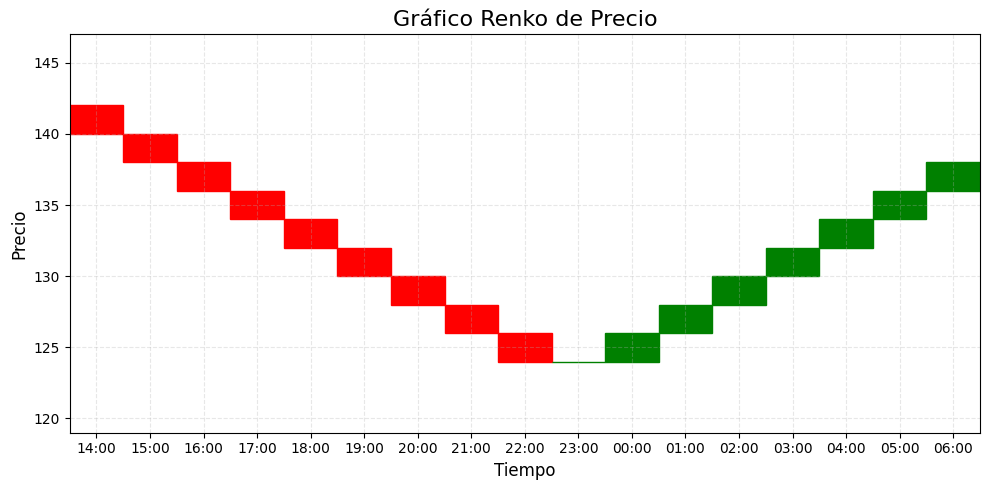

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# Usar fuente Roboto (debes tenerla instalada o descargarla)
roboto_path = fm.findfont("Roboto")  # Ajusta el nombre si es necesario
prop = fm.FontProperties(fname=roboto_path)

# Datos ficticios tipo Renko
precios = [142, 140, 138, 136, 134, 132, 130, 128, 126, 124, 124, 126, 128, 130, 132, 134, 136, 138]
colores = ['red' if precios[i] > precios[i+1] else 'green' for i in range(len(precios)-1)]

# Generar etiquetas horarias desde las 14:00
tiempos = pd.date_range("2023-01-01 14:00", periods=len(precios)-1, freq="H").strftime("%H:%M")

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 5))

for i, (precio1, precio2) in enumerate(zip(precios[:-1], precios[1:])):
    y = min(precio1, precio2)
    ax.add_patch(plt.Rectangle((i, y), 1, abs(precio2 - precio1), color=colores[i]))

# Ejes y etiquetas
ax.set_xticks(np.arange(len(tiempos)) + 0.5)
ax.set_xticklabels(tiempos, fontproperties=prop, fontsize=10)
ax.set_ylabel("Precio", fontproperties=prop, fontsize=12)
ax.set_xlabel("Tiempo", fontproperties=prop, fontsize=12)
ax.set_title("Gráfico Renko de Precio", fontproperties=prop, fontsize=16)

# Límites
ax.set_xlim(0, len(tiempos))
ax.set_ylim(min(precios) - 5, max(precios) + 5)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_13604\3684568029.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range("2023-01-01 14:00", periods=12, freq='H')
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: F

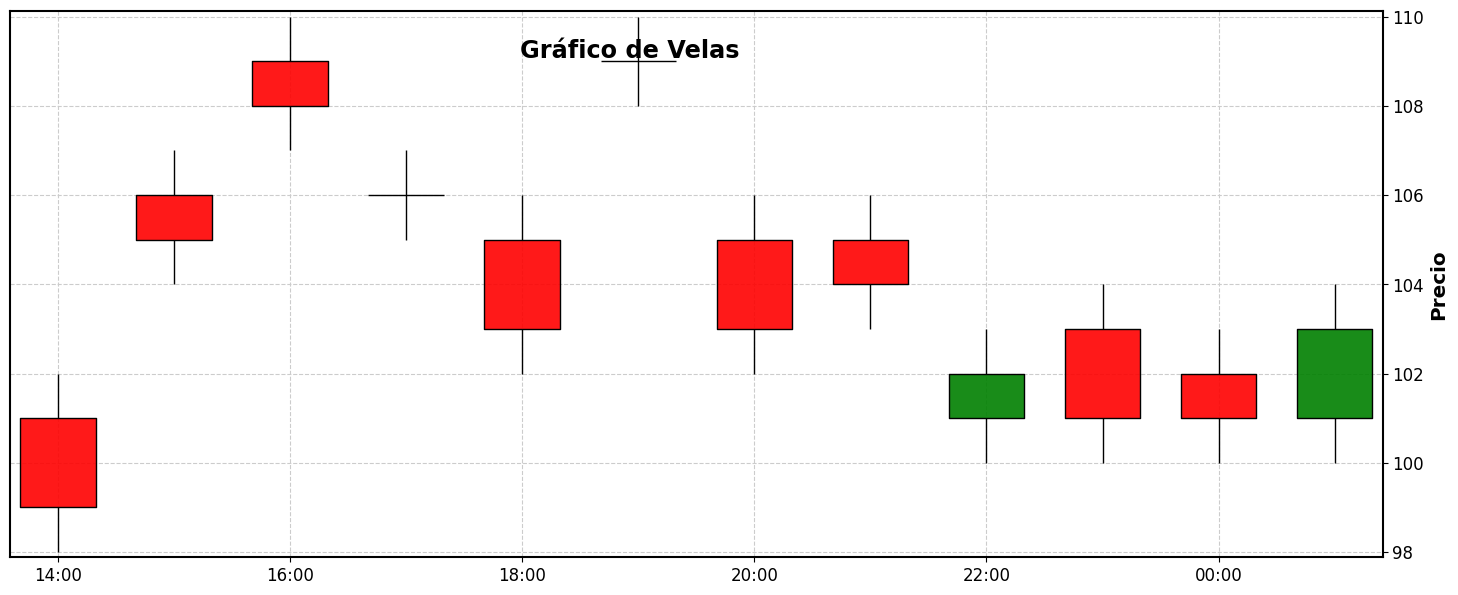

In [6]:
import mplfinance as mpf
import pandas as pd
import numpy as np
from matplotlib import rcParams

# Fuente Roboto (asegúrate de tenerla instalada)
rcParams['font.family'] = 'Roboto'

# Datos simulados
fechas = pd.date_range("2023-01-01 14:00", periods=12, freq='H')
datos = pd.DataFrame(index=fechas)
datos['Open'] = np.random.randint(100, 110, size=12)
datos['Close'] = datos['Open'] + np.random.randint(-3, 3, size=12)
datos['High'] = np.maximum(datos['Open'], datos['Close']) + 1
datos['Low'] = np.minimum(datos['Open'], datos['Close']) - 1
datos['Volume'] = 0  # opcional

# Estilo Roboto + colores suaves
estilo = mpf.make_mpf_style(
    base_mpf_style='classic',
    rc={'font.family': 'Roboto'},
    marketcolors=mpf.make_marketcolors(
        up='green', down='red',
        edge='black', wick='black', volume='in'
    )
)

# 📉 Graficar con proporciones normales y velas más juntas
mpf.plot(
    datos,
    type='candle',
    style=estilo,
    title='Gráfico de Velas',
    ylabel='Precio',
    volume=False,
    tight_layout=True,
    figratio=(10, 4),      # Menos horizontal
    figscale=1.1,          # Escala más compacta
    datetime_format='%H:%M',
    xrotation=0            # Texto horizontal en eje X
)

